The probability of contracting Covid-19 having taken the vaccine is $f_v$. 

The probability of contracting Covid-19 without vaccine $f_c$.

The data measurements are

$N_v=15,000$ the number of subjects that took the vaccine,

$n_v=5$ the number of subjects that took the vaccine and contracted Covid-19, 

$N_c=15,000$ the number of subjects in the control,

$n_c=90$ the number of subjects that contracted Covid-19 under the control treatment.

The posterior probability of the parameters given the data is
\begin{equation}
P(f_v, f_c\mid D) = \frac{P(D\mid f_v, f_c) P(f_v, f_c)}{P(D)},
\end{equation}

where the probability of the data given the parameters $f_v$ and $f_c$ is
\begin{equation}
P(D\mid f_v, f_c) = {N_v \choose n_v} f_v^{n_v} (1-f_v)^{N_v-n_v} {N_c \choose n_c} f_c^{n_c} (1-f_c)^{N_c-n_c}.
\end{equation}

If we assume uniform priors $$P(f_v, f_c) = 1,$$ then we can factorize the posteriors and obtain

\begin{equation}
P(f_v, f_c\mid D) = P(f_v\mid N_v, n_v)P(f_c\mid N_c, n_c),
\end{equation}

and

$$
\begin{aligned}
  P(f_v\mid N_v, n_v) &= \frac{f_v^{n_v} (1-f_v)^{N_v-n_v}}{\int_0^1 f ^{n_v} (1-f)^{N_v-n_v} df}, \\
  P(f_c\mid N_c, n_c) &= \frac{f_c^{n_c} (1-f_c)^{N_c-n_c}}{\int_0^1 f ^{n_c} (1-f)^{N_c-n_c} df}.
\end{aligned}
$$

Using the beta integral

$$
\begin{aligned}
  P(f_v\mid N_v, n_v) &= \frac{(N_v+1)!}{(n_v)! (N_v-n_v)!}\, f_v^{n_v} (1-f_v)^{N_v-n_v}, \\
  P(f_c\mid N_c, n_c) &= \frac{(N_c+1)!}{(n_c)! (N_c-n_c)!}\, f_c^{n_c} (1-f_c)^{N_c-n_c}.
\end{aligned}
$$

The question: **what is the probability that $$f_v  = \alpha f_c$$**  can be estimated using

$$
\begin{aligned}
P(f_v=\alpha f_c\mid D) &=
\int_0^1 df_c\ 
\left[P\left(f_c\mid N_c=15000, n_c=90\right)\times
P\left(f_v=\alpha f_c\mid N_v=15000, n_v=5\right) \right]\\
&= \int_0^1 df_c   \left[\frac{15001!}{90! 14910!} f_c^{90} (1-f_c)^{14910}\times  \frac{15001!}{5! 14995!} (\alpha\ f_c)^{5} (1-\alpha\ f_c)^{14995}\right]
\end{aligned}
$$


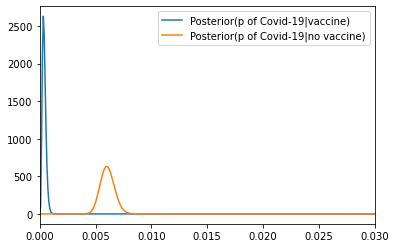

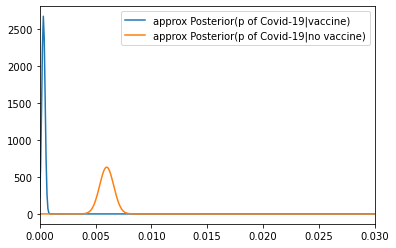

Posterior contracting Covid-19 with vaccine = fv  0.0003333333333333333 +/- 0.00014904635122945753
Posterior contracting Covid-19 control = fc  0.006 +/- 0.0006305553108173778


In [1]:
# Wednesday 21 Sep 2022
#
# w03 Model comparison and hypothesis testing
#
import warnings
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.special as special
import math
import decimal

def binomial_posterior(f, N, n):
    ff = 1.0 - f # probability of not contracting malaria
    
    # log[(N+1)!] - log[n!] - log[N-n)!]
    logcoeff  = np.real(special.loggamma(N+2))
    logcoeff -= np.real(special.loggamma(N-n+1))
    logcoeff -= np.real(special.loggamma(n+1))
                      
    
    # pdf = coeff * f^n * (1-f)^{N-n}
    logpdf = logcoeff + n*np.log(f) + (N-n)*np.log(ff)
    pdf    = np.exp(logpdf)
                    
    return pdf, logpdf

def binomial_pdata(f, N, n):
    ff = 1.0 - f # probability of not contracting malaria
    
    # log[(N)!] - log[n!] - log[N-n)!]
    logcoeff  = np.real(special.loggamma(N+1))
    logcoeff -= np.real(special.loggamma(N-n+1))
    logcoeff -= np.real(special.loggamma(n+1))
                      
    
    # pdf = coeff * f^n * (1-f)^{N-n}
    logpdf = logcoeff + n*np.log(f) + (N-n)*np.log(ff)
    pdf    = np.exp(logpdf)
                    
    return pdf, logpdf

Nv = 15000 # volunteers that have received the vaccine
Nc = 15000 # volunteers in control group (no vaccine)
nv = 5     # received vaccine and contracted Covid-19
nc = 90    # no vaccine and contracted Covid-19

f_min = 0.0000001
f_max = 0.9999999

f_bsize = 1/(100*np.sqrt(max(Nc,Nv)))
f_nbin  = int((f_max-f_min)/f_bsize)
f       = np.linspace(f_min, f_max, f_nbin) # the probability of contracting Covid-19
pdf_v = binomial_posterior(f, Nv, nv)
pdf_c = binomial_posterior(f, Nc, nc)

fv_mean = nv/Nv
fc_mean = nc/Nc

fv_sigma = np.sqrt(fv_mean*(1-fv_mean)/Nv)
fc_sigma = np.sqrt(fc_mean*(1-fc_mean)/Nc)

plt.xlim([0, 0.03])
plt.plot(f, pdf_v[0], label = "Posterior(p of Covid-19|vaccine)")
plt.plot(f, pdf_c[0], label = "Posterior(p of Covid-19|no vaccine)")
plt.legend(loc="upper right")
plt.show()

plt.xlim([0, 0.03])
plt.plot(f, stats.norm.pdf(f, fv_mean, fv_sigma), label = "approx Posterior(p of Covid-19|vaccine)")
plt.plot(f, stats.norm.pdf(f, fc_mean, fc_sigma), label = "approx Posterior(p of Covid-19|no vaccine)")
plt.legend(loc="upper right")
plt.show()

#plt.savefig("moderna.png")

print("Posterior contracting Covid-19 with vaccine = fv ", fv_mean, "+/-", fv_sigma)
print("Posterior contracting Covid-19 control = fc ", fc_mean, "+/-", fc_sigma)



Posterior of 1- fv/fc: max =  0.949999905 median at  0.9399999059999999


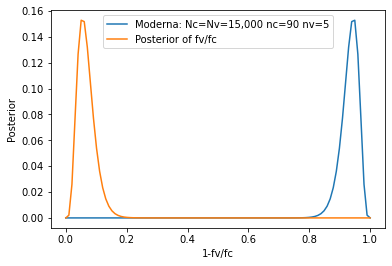

In [4]:
# P(H1|D)
# posterior of the efficacy = 1-fv/fc
#
Nv = 15000 # volunteers that have received the vaccine
Nc = 15000 # volunteers in control group (no vaccine)
nv = 5     # received vaccine and contracted Covid-19
nc = 90    # no vaccine and contracted Covid-19

# 0 <= a = 1-fv/fc <= 1
#
a_min  = 0.0000001
a_max  = 1.0
a_nbin = 100
a = np.linspace(a_min, a_max, a_nbin) # the probability of contracting covid-19

def posterior_efficacy(a, N1, n1, N2, n2):
    f_min   = 0.0000001
    f_max   = 0.9999999
    f_bsize = 1/(100*np.sqrt(max(N1,N2)))
    f_nbin  = int((f_max-f_min)/f_bsize)
    
    prior = 1/(f_max-f_min)
 
    sum = []
    for x in range(len(a)):
        thissum = 0  
        for b in range(f_nbin):
            f1 = f_min + b*f_bsize
            f2 = a[x] * f1
            if f2 > 0 and f2 < 1:
                pdf_2, logpdf_2 = binomial_posterior(f2, N2, n2)
                pdf_1, logpdf_1 = binomial_posterior(f1, N1, n1)
                thissum += np.exp(logpdf_1 + logpdf_2)
        
        thissum *= f_bsize * prior
        sum.append(thissum)
    
    return sum

def post_median(post, a_min, a_max, a_nbin): 
    
    bsize = (a_max-a_min)/a_nbin
    a_pmax = a_min + np.argmax(post)*bsize
    
    cum = 0
    for i in range(a_nbin):
        cum += post[i]
    #print ("cumulative = ", cum)
    
    for i in range(a_nbin):
        post[i] /= cum
    
    cum = 0
    for i in range(a_nbin):
        cum += post[i]
        a_median = a_min + i*bsize
        if (cum > 0.5):
            break        
    print("Posterior of 1- fv/fc: max = ", 1-a_pmax, "median at ", 1-a_median)
    return a_pmax, a_median
post = posterior_efficacy(a, Nc, nc, Nv, nv)
a_pmax, a_pmedian = post_median(post, a_min, a_max, a_nbin)


plt.plot(1-a, post, label = "Moderna: Nc=Nv=15,000 nc=90 nv=5")
plt.plot(a, post, label = "Posterior of fv/fc")
plt.legend()
plt.xlabel ('1-fv/fc')
plt.ylabel ('Posterior')
plt.show()
#plt.savefig("moderna.png")



Posterior of 1- fv/fc: max =  0.949999905 median at  0.9399999059999999
Posterior of 1- fv/fc: max =  0.9399999059999999 median at  0.9399999059999999
Posterior of 1- fv/fc: max =  0.949999905 median at  0.9399999059999999


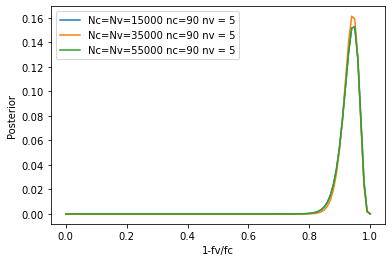

Posterior of 1- fv/fc: max =  0.89999991 median at  0.79999992


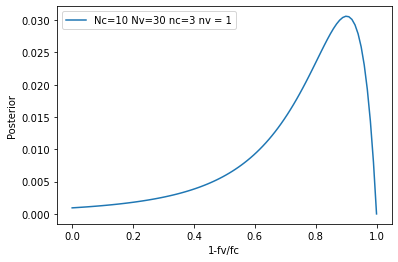

In [5]:
Nv = 15000 # volunteers that have received the vaccine
Nc = 15000 # volunteers in control group (no vaccine)
nv = 5     # received vaccine and contracted Covid-19
nc = 90    # no vaccine and contracted Covid-19
post1 = posterior_efficacy(a, Nc, nc, Nv, nv)
a_pmax1, a_pmedian1 = post_median(post1, a_min, a_max, a_nbin)


Nv = 90 # volunteers that have received the vaccine
Nc = 90 # volunteers in control group (no vaccine)
nv = 5     # received vaccine and contracted Covid-19
nc = 90    # no vaccine and contracted Covid-19
post2 = posterior_efficacy(a, Nc, nc, Nv, nv)
a_pmax2, a_pmedian2 = post_median(post2, a_min, a_max, a_nbin)


Nv = 55000 # volunteers that have received the vaccine
Nc = 55000 # volunteers in control group (no vaccine)
nv = 5     # received vaccine and contracted Covid-19
nc = 90    # no vaccine and contracted Covid-19
post3 = posterior_efficacy(a, Nc, nc, Nv, nv)
a_pmax3, a_pmedian3 = post_median(post3, a_min, a_max, a_nbin)

plt.plot(1-a, post1, label = "Nc=Nv=15000 nc=90 nv = 5")
plt.legend()
plt.plot(1-a, post2, label = "Nc=Nv=35000 nc=90 nv = 5")
plt.legend()
plt.plot(1-a, post3, label = "Nc=Nv=55000 nc=90 nv = 5")
plt.legend()
plt.xlabel ('1-fv/fc')
plt.ylabel ('Posterior')
plt.show()
#plt.savefig("moderna.png")

Nv = 30 # volunteers that have received the vaccine
Nc = 10 # volunteers in control group (no vaccine)
nv = 1  # received vaccine and contracted Covid-19
nc = 3  # no vaccine and contracted Covid-19
post4 = posterior_efficacy(a, Nc, nc, Nv, nv)
a_pmax4, a_pmedian4 = post_median(post4, a_min, a_max, a_nbin)

plt.plot(1-a, post4, label = "Nc=10 Nv=30 nc=3 nv = 1")
plt.legend()
plt.legend()
plt.xlabel ('1-fv/fc')
plt.ylabel ('Posterior')
plt.show()
#plt.savefig("effectivenes.png")


In [ ]:
# BNT162b2 (f) or mRNA-1273 (m)
# US veterans
# Jan 4 - May 14 2021
#
# Hernan
# January 13, 2022
# N Engl J Med 2022; 386:105-115
# DOI: 10.1056/NEJMoa2115463

N = 219842

# documented infections
n_0_f = 1135
n_0_m = 881

#symtomatic
n_1_f = 324
n_1_m = 232

# hospitalizations
n_2_f = 258
n_2_m = 153

#ICU
n_3_f = 77
n_3_m = 48

# death
n_4_f = 43
n_4_m = 38

a_min   =  0.0000000001
a_max   =  0.9999999999999
a_bsize = 1/(100*np.sqrt(N))
a_nbin  = int((a_max-a_min)/a_bsize)
a       = np.linspace(a_min, a_max, a_nbin) # the probability of contracting covid-19

f_nbin = a_nbin

post_0 = posterior(a, N, n_0_m, N, n_0_f, f_min, f_max, f_nbin)
a_pmax_0, a_pmedian_0 = post_median(post_0, a_min, a_max, a_nbin)
post_1 = posterior(a, N, n_1_m, N, n_1_f, f_min, f_max, f_nbin)
a_pmax_1, a_pmedian_1 = post_median(post_1, a_min, a_max, a_nbin)
post_2 = posterior(a, N, n_2_m, N, n_2_f, f_min, f_max, f_nbin)
a_pmax_2, a_pmedian_2 = post_median(post_2, a_min, a_max, a_nbin)
post_3 = posterior(a, N, n_3_m, N, n_3_f, f_min, f_max, f_nbin)
a_pmax_3, a_pmedian_3 = post_median(post_3, a_min, a_max, a_nbin)
post_4 = posterior(a, N, n_4_m, N, n_4_f, f_min, f_max, f_nbin)
a_pmax_4, a_pmedian_4 = post_median(post_4, a_min, a_max, a_nbin)

plt.plot(a, post_0, label = "documented infected")
plt.plot(a, post_1, label = "symtomatic")
plt.plot(a, post_2, label = "hospitalizations")
plt.plot(a, post_3, label = "ICU")
plt.plot(a, post_4, label = "deaths")
plt.legend()
plt.xlabel ('f_BNT162b2/f_mRNA-1273')
plt.ylabel ('Posterior')
plt.show()
#